In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing Data**

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


**Data Cleaning**

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df.dropna(inplace = True)

# Exploratory Data Analysis

**Customer Type**

In [6]:
newdf = df['Segment'].value_counts().reset_index()

In [7]:
newdf.rename(columns={'count':'No Of Customers', 'Segment':'Customer Type'}, inplace = True)

In [8]:
 df1 =newdf.sort_values(by = 'Customer Type' ,ascending = False)

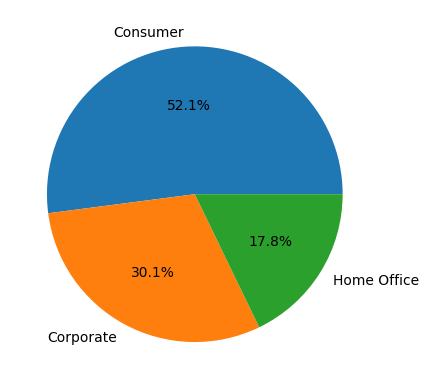

In [9]:
plt.pie(newdf['No Of Customers'] , labels = newdf['Customer Type'],autopct = '%0.1f%%')
plt.show()

**No Of Orders Done By Ship Mode**

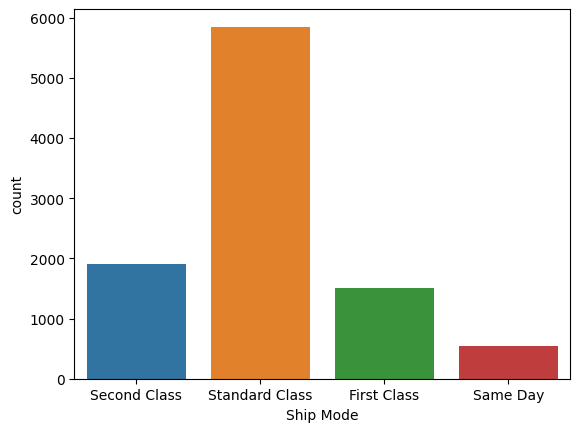

In [10]:
sns.countplot(x='Ship Mode',data=df)
plt.show()

**Valuable Customers**

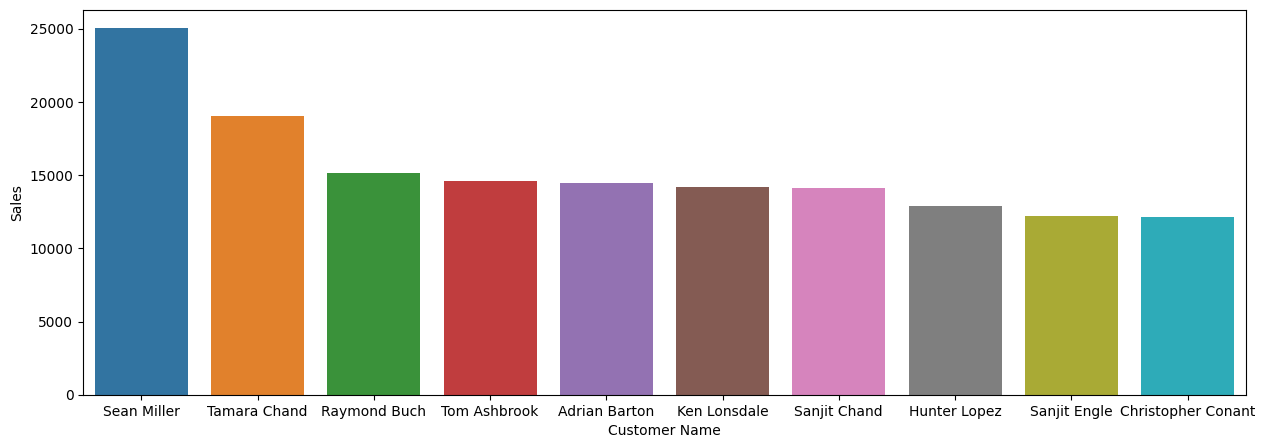

In [11]:
df2 = df.groupby(by='Customer Name',as_index = False)['Sales'].sum().sort_values(by = 'Sales',ascending = False)
plt.figure(figsize=(15,5))
df3 = df2.nlargest(10,'Sales')
sns.barplot(x='Customer Name' , y = 'Sales' , data =df3)
plt.show()

**Mostly Purchased Sub-Category**

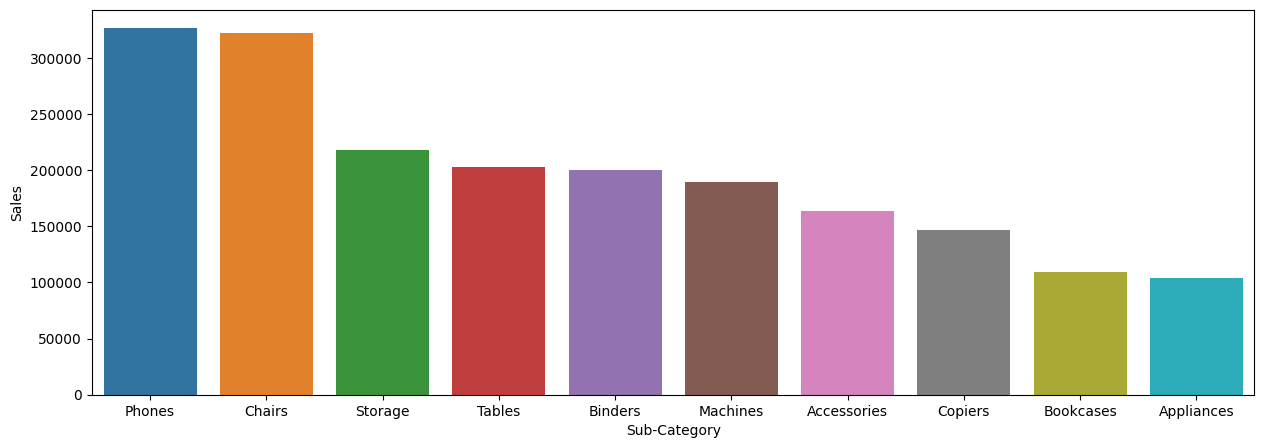

In [12]:
df4 = df.groupby(by='Sub-Category',as_index = False)['Sales'].sum().sort_values(by = 'Sales',ascending = False)
plt.figure(figsize=(15,5))
df5 = df4.nlargest(10,'Sales')
sns.barplot(x='Sub-Category' , y = 'Sales' , data =df5)
plt.show()

**Mostly Purchased Products**

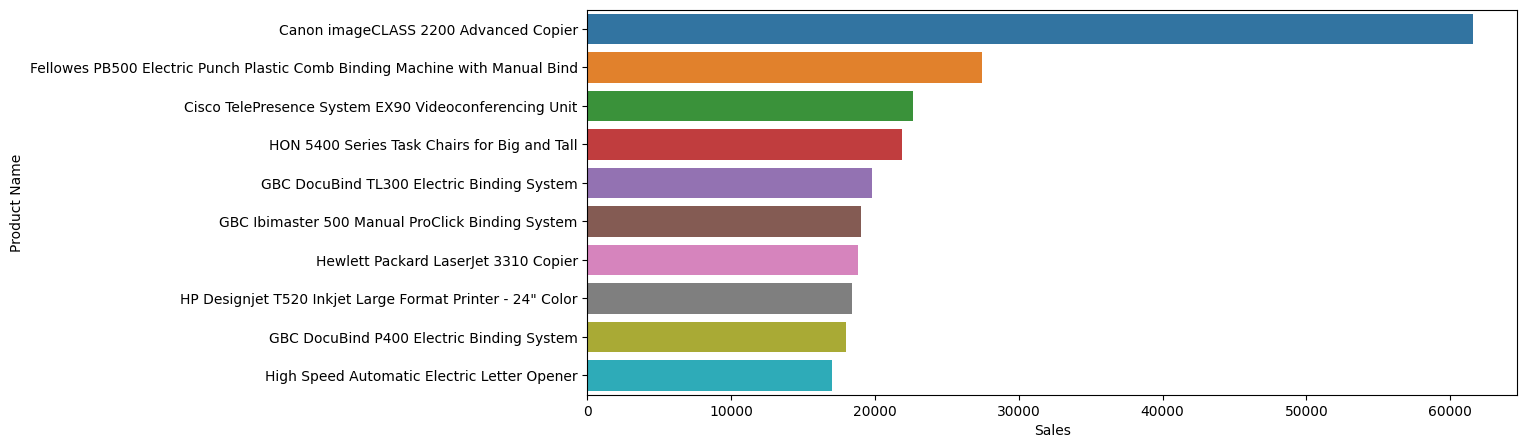

In [13]:
df6 = df.groupby(by='Product Name',as_index = False)['Sales'].sum().sort_values(by = 'Sales',ascending = False)
plt.figure(figsize=(12,5))
df7 = df6.nlargest(10,'Sales')
ax =sns.barplot(x='Sales' , y = 'Product Name' , data =df7)
plt.show()

**Sales By Region**

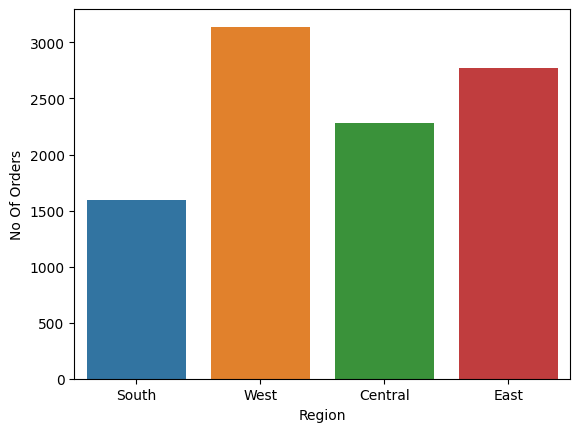

In [14]:
sns.countplot(x='Region',data =df)
plt.ylabel('No Of Orders')
plt.show()

**Total Sales**

In [15]:
df['Sales'].sum()

2252607.4127

**Conclusions:**

*1.Mostly Buyers are from Consumers Segment*

*2.Almost all Orders are shiped by 'Second Class'.*

*3.Most of the sales are from Sean Miller,Tamara Chand and Raymond Buch.*

*4.Phones and Chairs are the mostly purchased products.*

*5.Canon ImageCLASS 2200.... is mostly buyed product.*

*6.Mostly Buyers are from West Region.*